In [253]:
# 1-2 - Set up imports and load the data
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

data = pd.read_csv("../data/drug200.csv")

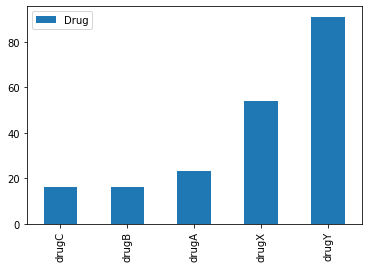

In [254]:
# 3 - Plot instances of each drug
drug_instance_count = pd.DataFrame(data["Drug"].value_counts(ascending=True))
drug_instance_count_chart = drug_instance_count.plot.bar().get_figure()
drug_instance_count_chart.savefig("drug-distribution.pdf")

In [255]:
# 4 - Convert all ordinal and nominal features in numerical format
results = data['Drug']
features = data.loc[:, data.columns != 'Drug']
data_numerical = pd.get_dummies(features, columns = ['Sex', 'BP', 'Cholesterol'])

In [295]:
# 5 - Split data set
training_x, test_x, training_y, test_y = train_test_split(data_numerical, results)

In [296]:
# 5a - Gaussian Naive Bayes Classifier
gaussian_model = GaussianNB()
gaussian_model.fit(training_x, training_y)
gaussian_y_pred = gaussian_model.predict(test_x)
print(gaussian_y_pred)

# confusion matrix
print(confusion_matrix(test_y, gaussian_y_pred))

# precision score
print(precision_score(test_y, gaussian_y_pred, average=None))

# recall score
print(recall_score(test_y, gaussian_y_pred, average=None))

# f1-measure
print(f1_score(test_y, gaussian_y_pred, average=None))

# accuracy
print(accuracy_score(test_y, gaussian_y_pred))

# macro-average f1
print(f1_score(test_y, gaussian_y_pred, average='macro'))

# weighted-average f1
print(f1_score(test_y, gaussian_y_pred, average='weighted'))

[[ 7  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 13  0]
 [ 6  2  3  5  6]]
[0.53846154 0.66666667 0.57142857 0.72222222 1.        ]
[1.         1.         1.         1.         0.27272727]
[0.7        0.8        0.72727273 0.83870968 0.42857143]
0.68
0.6989107666527021
0.6268177628822791


In [297]:
# 5b - Base Decision Tree
decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(training_x, training_y)
base_dt_y_pred = decision_tree.predict(test_x)
print(base_dt_y_pred)

# confusion matrix
print(confusion_matrix(test_y, base_dt_y_pred))

# precision score
print(precision_score(test_y, base_dt_y_pred, average=None))

# recall score
print(recall_score(test_y, base_dt_y_pred, average=None))

# f1-measure
print(f1_score(test_y, base_dt_y_pred, average=None))

# accuracy
print(accuracy_score(test_y, base_dt_y_pred))

# macro-average f1
print(f1_score(test_y, base_dt_y_pred, average='macro'))

# weighted-average f1
print(f1_score(test_y, base_dt_y_pred, average='weighted'))

[[ 7  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 13  0]
 [ 0  0  0  0 22]]
[1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1.]
1.0
1.0
1.0


In [298]:
# 5c - Top Decision Tree
decision_tree = tree.DecisionTreeClassifier()
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 17],
    'min_samples_split': [2, 8, 18]
}
grid_tree = GridSearchCV(estimator = decision_tree,
                         param_grid = params,
                         scoring = 'accuracy',
                         cv = 5,
                         verbose = 1,
                         n_jobs = -1)

grid_tree.fit(training_x, training_y)
print(grid_tree.best_estimator_)

# Using best estimator (DecisionTreeClassifier(max_depth=5))
decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(training_x, training_y)
base_dt_y_pred = decision_tree.predict(test_x)

# confusion matrix
print(confusion_matrix(test_y, base_dt_y_pred))

# precision score
print(precision_score(test_y, base_dt_y_pred, average=None))

# recall score
print(recall_score(test_y, base_dt_y_pred, average=None))

# f1-measure
print(f1_score(test_y, base_dt_y_pred, average=None))

# accuracy
print(accuracy_score(test_y, base_dt_y_pred))

# macro-average f1
print(f1_score(test_y, base_dt_y_pred, average='macro'))

# weighted-average f1
print(f1_score(test_y, base_dt_y_pred, average='weighted'))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[[ 7  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 13  0]
 [ 0  0  0  0 22]]
[1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1.]
1.0
1.0
1.0


In [299]:
# 5d - Perceptron
perceptron = Perceptron()
perceptron.fit(training_x, training_y)
print(perceptron.score(test_x, test_y))
perceptron_y_pred = perceptron.predict(test_x)
print(perceptron_y_pred)

# confusion matrix
print(confusion_matrix(test_y, perceptron_y_pred))

# precision score
print(precision_score(test_y, perceptron_y_pred, average=None))

# recall score
print(recall_score(test_y, perceptron_y_pred, average=None))

# f1-measure
print(f1_score(test_y, perceptron_y_pred, average=None))

# accuracy
print(accuracy_score(test_y, perceptron_y_pred))

# macro-average f1
print(f1_score(test_y, perceptron_y_pred, average='macro'))

# weighted-average f1
print(f1_score(test_y, perceptron_y_pred, average='weighted'))

0.5
[[ 0  2  0  0  5]
 [ 0  3  0  0  1]
 [ 0  1  0  0  3]
 [ 0  5  0  0  8]
 [ 0  0  0  0 22]]
[0.         0.27272727 0.         0.         0.56410256]
[0.   0.75 0.   0.   1.  ]
[0.         0.4        0.         0.         0.72131148]
0.5
0.2242622950819672
0.34937704918032786


/Users/matthewfrances/Documents/development/School/Fall2021/COMP472/COMP472_Mini_Project_1/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [301]:
# 5e - Base Multi-Layered Perceptron
base_mlp = MLPClassifier(hidden_layer_sizes=(1,100), activation='logistic', solver='sgd')
base_mlp.fit(training_x, training_y)
mlp_y_pred = base_mlp.predict(test_x)
print(mlp_y_pred)

# confusion matrix
print(confusion_matrix(test_y, mlp_y_pred))

# precision score
print(precision_score(test_y, mlp_y_pred, average=None))

# recall score
print(recall_score(test_y, mlp_y_pred, average=None))

# f1-measure
print(f1_score(test_y, mlp_y_pred, average=None))

# accuracy
print(accuracy_score(test_y, mlp_y_pred))

# macro-average f1
print(f1_score(test_y, mlp_y_pred, average='macro'))

# weighted-average f1
print(f1_score(test_y, mlp_y_pred, average='weighted'))

[[ 0  0  0  0  7]
 [ 0  0  0  0  4]
 [ 0  0  0  0  4]
 [ 0  0  0  0 13]
 [ 0  0  0  0 22]]
[0.   0.   0.   0.   0.44]
[0. 0. 0. 0. 1.]
[0.         0.         0.         0.         0.61111111]
0.44
0.12222222222222223
0.26888888888888896


/Users/matthewfrances/Documents/development/School/Fall2021/COMP472/COMP472_Mini_Project_1/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [302]:
# 5f - Top Multi-Layered Perceptron
mlp = MLPClassifier(hidden_layer_sizes=(1,100), activation='logistic', solver='sgd')
params = {
    'activation': ['logistic', 'tanh', 'relu', 'identity'],
    'hidden_layer_sizes': [(2, 35), (3, 10)],
    'solver': ['adam', 'sgd']
}
top_mlp = GridSearchCV(estimator = mlp,
                       param_grid = params)
top_mlp.fit(training_x, training_y)
print(top_mlp.best_estimator_)

# Using best estimator (MLPClassifier(activation='identity', hidden_layer_sizes=(2, 35)))
base_mlp = MLPClassifier(activation='identity', hidden_layer_sizes=(2, 35))
base_mlp.fit(training_x, training_y)
mlp_y_pred = base_mlp.predict(test_x)

# confusion matrix
print(confusion_matrix(test_y, mlp_y_pred))

# precision score
print(precision_score(test_y, mlp_y_pred, average=None))

# recall score
print(recall_score(test_y, mlp_y_pred, average=None))

# f1-measure
print(f1_score(test_y, mlp_y_pred, average=None))

# accuracy
print(accuracy_score(test_y, mlp_y_pred))

# macro-average f1
print(f1_score(test_y, mlp_y_pred, average='macro'))

# weighted-average f1
print(f1_score(test_y, mlp_y_pred, average='weighted'))

/Users/matthewfrances/Documents/development/School/Fall2021/COMP472/COMP472_Mini_Project_1/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/matthewfrances/Documents/development/School/Fall2021/COMP472/COMP472_Mini_Project_1/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/matthewfrances/Documents/development/School/Fall2021/COMP472/COMP472_Mini_Project_1/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/matthewfrances/Documents/development/School/Fall2021/C

/Users/matthewfrances/Documents/development/School/Fall2021/COMP472/COMP472_Mini_Project_1/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/matthewfrances/Documents/development/School/Fall2021/COMP472/COMP472_Mini_Project_1/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/matthewfrances/Documents/development/School/Fall2021/COMP472/COMP472_Mini_Project_1/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/matthewfrances/Documents/development/School/Fall2021/C

/Users/matthewfrances/Documents/development/School/Fall2021/COMP472/COMP472_Mini_Project_1/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/matthewfrances/Documents/development/School/Fall2021/COMP472/COMP472_Mini_Project_1/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/matthewfrances/Documents/development/School/Fall2021/COMP472/COMP472_Mini_Project_1/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[[ 0  1  0  0  6]
 [ 0  0  0  3  1]
 [ 0  0  0  0  4]
 [ 0  0  0  0 13]
 [ 0  0  0  0 22]]
[0.         0.         0.         0.         0.47826087]
[0. 0. 0. 0. 1.]
[0.         0.         0.         0.         0.64705882]
0.44
0.12941176470588237
0.2847058823529412


/Users/matthewfrances/Documents/development/School/Fall2021/COMP472/COMP472_Mini_Project_1/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/matthewfrances/Documents/development/School/Fall2021/COMP472/COMP472_Mini_Project_1/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/matthewfrances/Documents/development/School/Fall2021/COMP472/COMP472_Mini_Project_1/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/matthewfrances/Documents/development/School/Fall2021/C